In [2]:
import json
import os


def read_thm_file(thmname, base = "tests/follow/set.mm/json"):
    with open(os.path.join(base, thmname+".json"), "r") as f:
        block = json.load(f)
    return block 

with open("tests/follow/set.mm/json/thms.txt", "r") as thms_f:
    thms = [
        line.strip() for line in thms_f.readlines()
    ]  # 使用 strip() 去掉每行的换行符
print(len(thms))

4890


In [3]:
thm_cost_info = []
for thm in thms:
    block = read_thm_file(thm)
    thm_cost_info.append(block['cost'])
print(sum(thm_cost_info))

128452558032159


4393

sum of filtered_counts 369


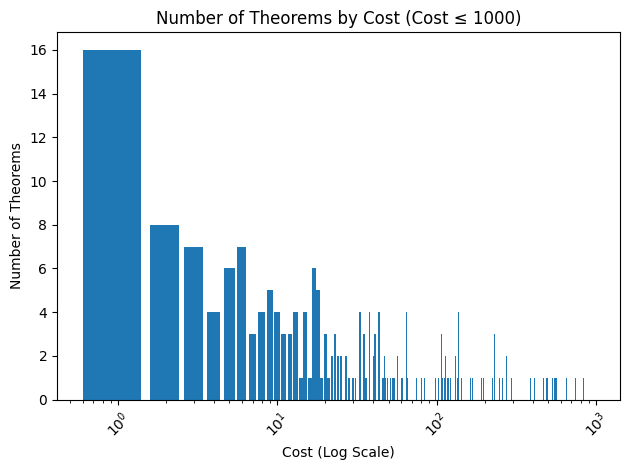

In [14]:
# 绘制柱状图
from collections import Counter

import matplotlib.pyplot as plt

cost_counter = Counter(thm_cost_info)  # 统计每个成本出现的次数
len(cost_counter)

costs = list(cost_counter.keys())
counts = list(cost_counter.values())

filtered_costs = [cost for cost in costs if cost <= 1000]
filtered_counts = [count for cost, count in zip(costs, counts) if cost <= 1000]

print("sum of filtered_counts", sum(filtered_counts))

plt.bar(filtered_costs, filtered_counts)
plt.xlabel('Cost (Log Scale)')
plt.ylabel('Number of Theorems')
plt.title('Number of Theorems by Cost (Cost ≤ 1000)')
plt.xscale('log')  # Set x-axis to log scale
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Automatically adjust layout to avoid label overlap
plt.show()